In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import sys
import librosa
import librosa.display as ipd
from IPython.display import Audio

In [3]:
songs_dir='./Audio_Song_Actors_01-24'
speech_dir="./Audio_Speech_Actors_01-24"

# Speech Data

In [4]:
print(os.listdir('./Audio_Speech_Actors_01-24'))
speech_dir_list = [d for d in os.listdir('./Audio_Speech_Actors_01-24') if d.startswith('Actor_')]
speech_dir_list.sort()

['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', '.DS_Store', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']


In [5]:
print(speech_dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [6]:
speech_emotion = []
speech_path = []

# speech_dir_list is already filtered — only includes Actor_* directories
for actor_dir in speech_dir_list:
    actor_sp = os.path.join(speech_dir, actor_dir)
  
    
    for file in os.listdir(actor_sp):
        # Skip hidden/system files
        if file.startswith('.') or not file.endswith('.wav'):
            continue

        part_name = file.split('.')[0]
       

        part_sp = file.split('-')
  

        if len(part_sp) < 3:
            print(f"Skipping malformed file: {file}")
            continue

        speech_emotion.append(int(part_sp[2]))
        speech_path.append(os.path.join(speech_dir, actor_dir, file))


In [7]:
# dataframe for emotion of files
emotion_df1 = pd.DataFrame(speech_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df1 = pd.DataFrame(speech_path, columns=['Path'])
speech_df = pd.concat([emotion_df1, path_df1], axis=1)


In [8]:
speech_df.shape

(1440, 2)

In [9]:
speech_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
speech_df.head()

/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_27901/3586258182.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  speech_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


,Emotions,Path
0,surprise,./Audio_Speech_Actors_01-24/Actor_01/03-01-08-...
1,surprise,./Audio_Speech_Actors_01-24/Actor_01/03-01-08-...
2,angry,./Audio_Speech_Actors_01-24/Actor_01/03-01-05-...
3,fear,./Audio_Speech_Actors_01-24/Actor_01/03-01-06-...
4,fear,./Audio_Speech_Actors_01-24/Actor_01/03-01-06-...


In [10]:
speech_df.groupby('Emotions')['Path'].count()

Emotions
angry       192
calm        192
disgust     192
fear        192
happy       192
neutral      96
sad         192
surprise    192
Name: Path, dtype: int64

# Songs Data

In [11]:
songs_dir_list=os.listdir('./Audio_Song_Actors_01-24')

In [12]:
print(os.listdir('./Audio_Song_Actors_01-24'))
songs_dir_list = [d for d in os.listdir('./Audio_Song_Actors_01-24') if d.startswith('Actor_')]
songs_dir_list.sort()


['Actor_16', 'Actor_11', 'Actor_18', 'Actor_20', 'Actor_21', 'Actor_19', 'Actor_10', 'Actor_17', 'Actor_04', 'Actor_03', 'Actor_02', 'Actor_05', 'Actor_12', 'Actor_15', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_14', 'Actor_13', 'Actor_09', 'Actor_07', 'Actor_06', 'Actor_01', 'Actor_08']


In [13]:
print(songs_dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [14]:
songs_emotion = []
songs_path = []

# songs_dir_list is already filtered — only includes Actor_* directories
for actor_dir in songs_dir_list:
    actor_so = os.path.join(songs_dir, actor_dir)

    for file in os.listdir(actor_so):
        # Skip hidden/system files
        if file.startswith('.') or not file.endswith('.wav'):
            continue

        part_name = file.split('.')[0]
        part_so = part_name.split('-')  # Split only the filename without extension

        if len(part_so) < 3:
            print(f"Skipping malformed file: {file}")
            continue

        try:
            songs_emotion.append(int(part_so[2]))
        except ValueError:
            print(f"Skipping file with non-integer emotion: {file}")
            continue

        songs_path.append(os.path.join(songs_dir, actor_dir, file))


In [15]:
# dataframe for emotion of files
emotion_df2 = pd.DataFrame(songs_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df2 = pd.DataFrame(songs_path, columns=['Path'])
songs_df = pd.concat([emotion_df2, path_df2], axis=1)


In [16]:
songs_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
songs_df.head()


/var/folders/md/bl7d8ffd71j23r2c46ylgpxm0000gn/T/ipykernel_27901/800179290.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  songs_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


,Emotions,Path
0,happy,./Audio_Song_Actors_01-24/Actor_01/03-02-03-02...
1,happy,./Audio_Song_Actors_01-24/Actor_01/03-02-03-01...
2,calm,./Audio_Song_Actors_01-24/Actor_01/03-02-02-02...
3,calm,./Audio_Song_Actors_01-24/Actor_01/03-02-02-01...
4,neutral,./Audio_Song_Actors_01-24/Actor_01/03-02-01-01...


In [17]:
songs_df.shape

(1012, 2)

In [18]:
songs_df.groupby('Emotions')['Path'].count()

Emotions
angry      184
calm       184
fear       184
happy      184
neutral     92
sad        184
Name: Path, dtype: int64

## Merging and CSV Creation

In [19]:
data_merged = pd.concat([speech_df, songs_df], axis = 0)
data_merged.to_csv("speech_data.csv",index=False)
data_merged.head()

,Emotions,Path
0,surprise,./Audio_Speech_Actors_01-24/Actor_01/03-01-08-...
1,surprise,./Audio_Speech_Actors_01-24/Actor_01/03-01-08-...
2,angry,./Audio_Speech_Actors_01-24/Actor_01/03-01-05-...
3,fear,./Audio_Speech_Actors_01-24/Actor_01/03-01-06-...
4,fear,./Audio_Speech_Actors_01-24/Actor_01/03-01-06-...


# Data Exploration

In [20]:
df=data_merged.copy()

In [21]:
df.shape

(2452, 2)

In [22]:
df.isnull().sum()

Emotions    0
Path        0
dtype: int64

In [23]:
df.duplicated().sum()

0

<Axes: title={'center': 'Count of Emotions'}, xlabel='Emotions'>

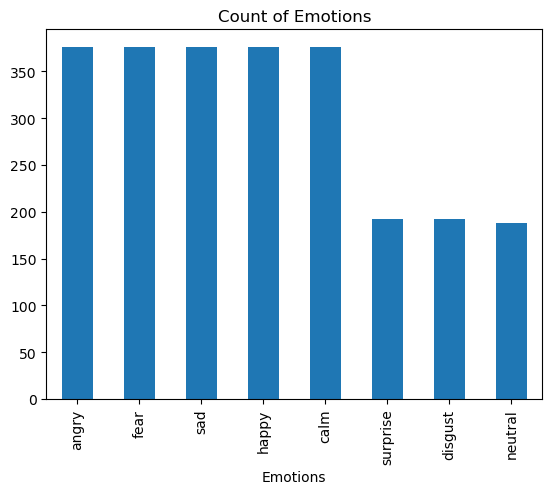

In [24]:
df['Emotions'].value_counts().plot(kind='bar',title='Count of Emotions')

In [25]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

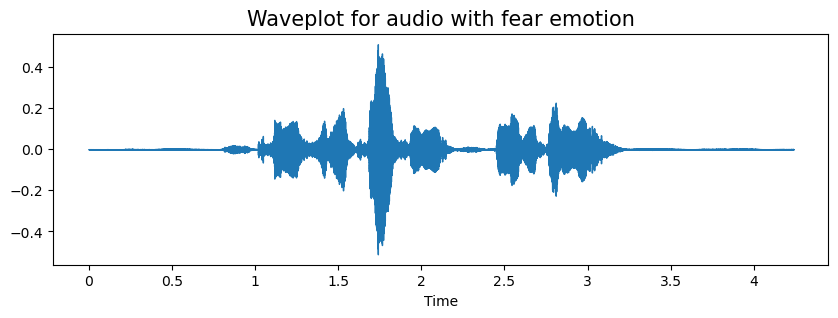

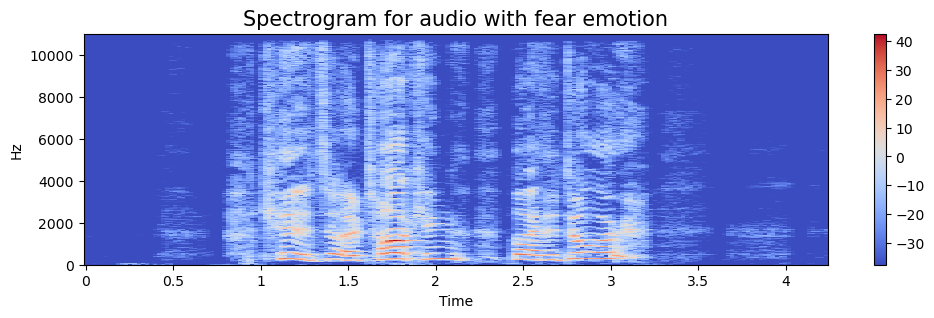

In [26]:
emotion='fear'
path = np.array(df.Path[df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


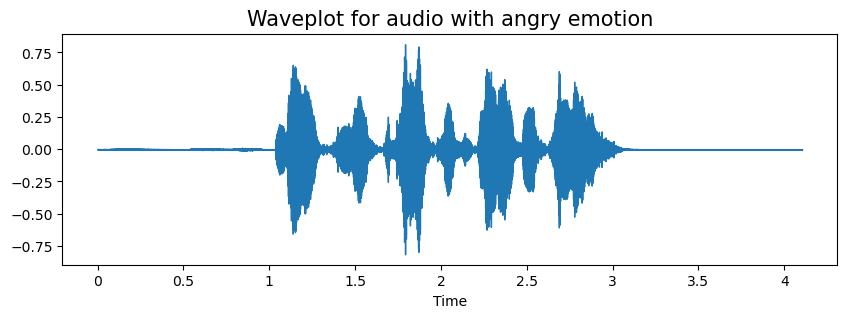

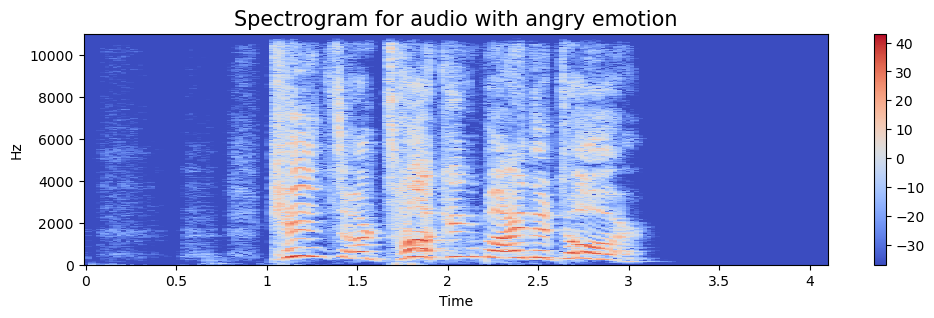

In [27]:
emotion='angry'
path = np.array(df.Path[df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


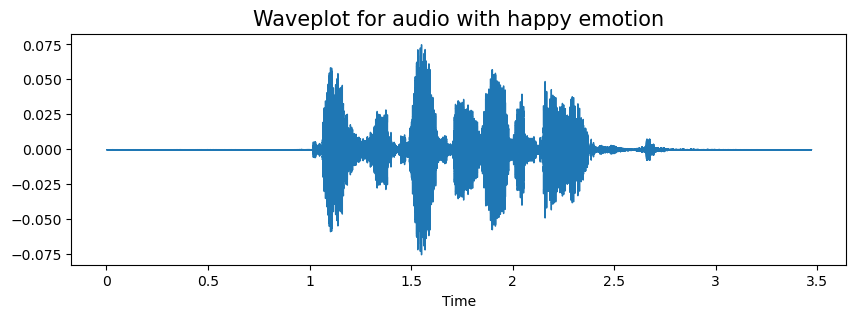

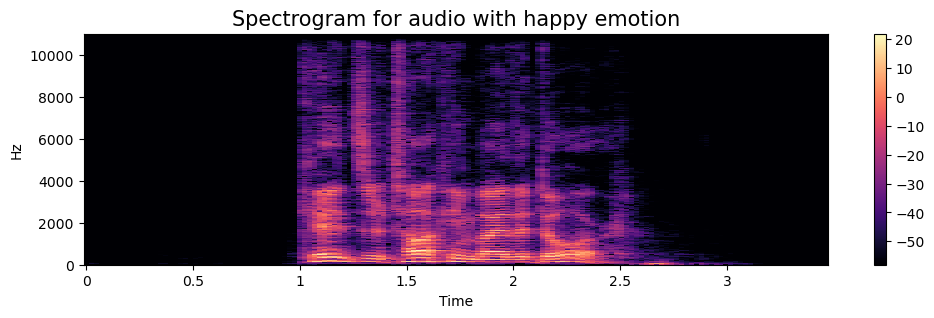

In [28]:
emotion='happy'
path = np.array(df.Path[df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [29]:
df.head()

,Emotions,Path
0,surprise,./Audio_Speech_Actors_01-24/Actor_01/03-01-08-...
1,surprise,./Audio_Speech_Actors_01-24/Actor_01/03-01-08-...
2,angry,./Audio_Speech_Actors_01-24/Actor_01/03-01-05-...
3,fear,./Audio_Speech_Actors_01-24/Actor_01/03-01-06-...
4,fear,./Audio_Speech_Actors_01-24/Actor_01/03-01-06-...


In [30]:
x=df.drop(columns=['Emotions'])
y=df[['Emotions']]

# Data Augmentation

In [31]:
def noise(data):
    noise_amplitude = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amplitude*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)


def pitch(data, sampling_rate, n_steps=2):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=n_steps)



In [32]:
np.array(x.Path)[1]

'./Audio_Speech_Actors_01-24/Actor_01/03-01-08-01-01-01-01.wav'

In [33]:
path = np.array(x.Path)[1]
data, sample_rate = librosa.load(path)

### Simple Audio

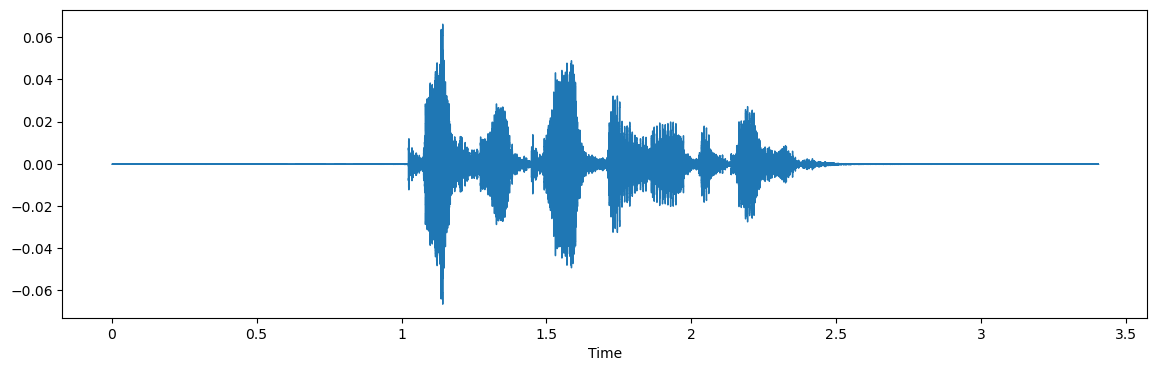

In [34]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

### Noise Injection

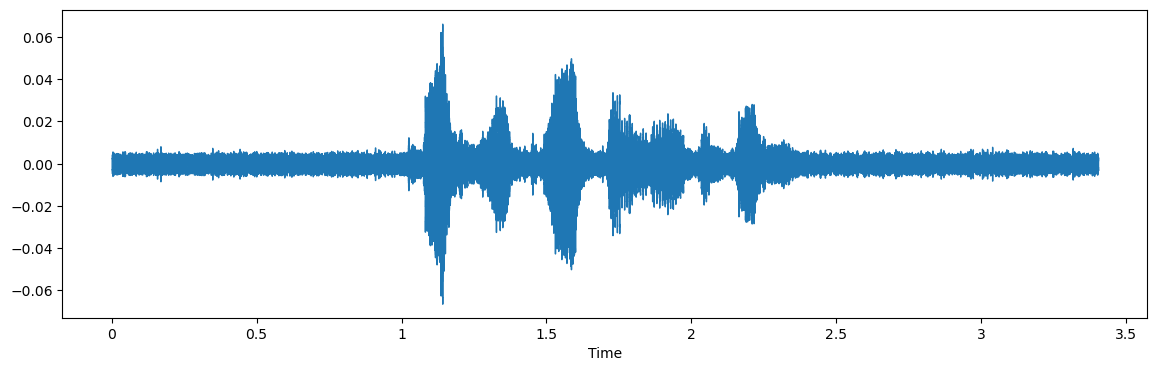

In [35]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### Stretching

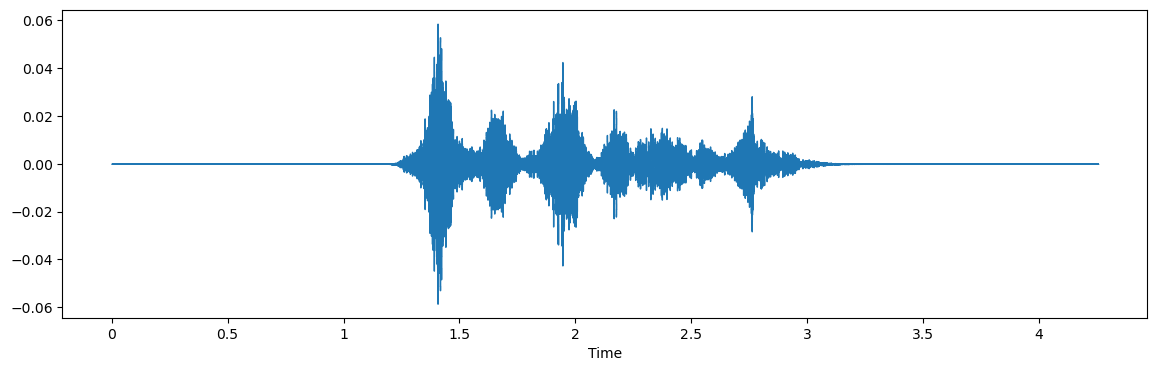

In [36]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)




### Shifting

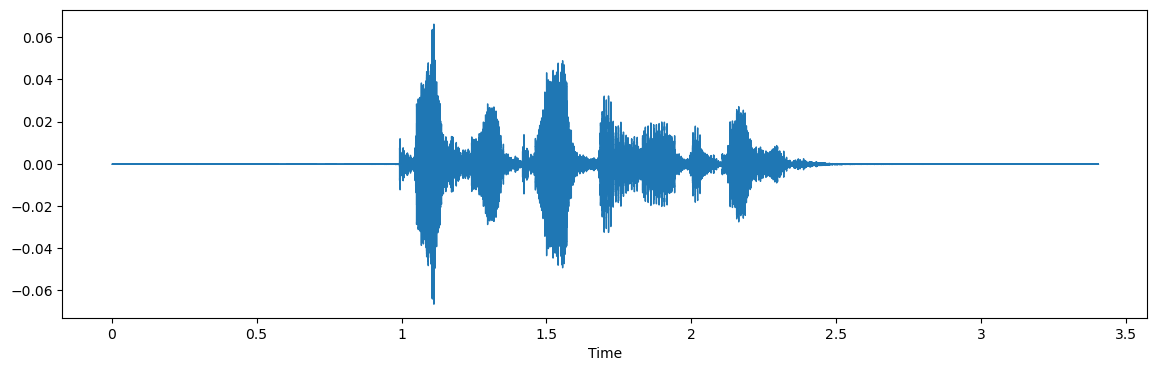

In [37]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

### Pitch

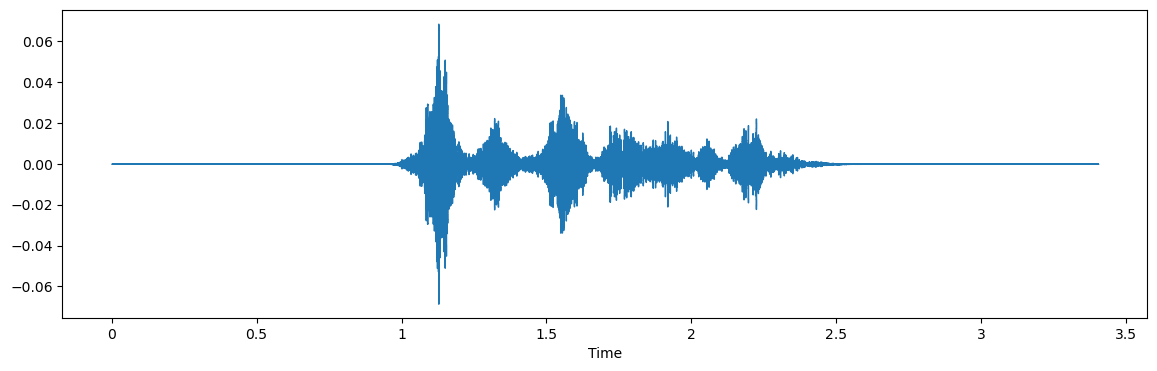

In [38]:
x = pitch(data, sample_rate, n_steps=2) 
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)




# FEATURE CONSTRUCTION

In [39]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr))

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) 

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) 

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) 
    
    return result
    


In [40]:

def get_features(path):    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [41]:
X=[]
Y=[]
paths = np.array(df.Path)
emotions = np.array(df.Emotions)
for path, emotion in zip(paths, emotions):
    if not os.path.exists(path):
        continue
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)


In [45]:
len(X), len(Y)

(7356, 7356)

In [46]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.233258,0.643956,0.681344,0.723311,0.738974,0.709899,0.674264,0.607236,0.645311,0.643876,...,0.000430,0.000428,0.000305,0.000241,0.000340,0.000684,0.000838,0.000379,0.000030,surprise
1,0.288348,0.743621,0.758606,0.811432,0.796376,0.789049,0.675836,0.616192,0.645701,0.675712,...,0.000677,0.000678,0.000554,0.000513,0.000572,0.000900,0.001078,0.000605,0.000282,surprise
2,0.175109,0.632104,0.589651,0.640122,0.685226,0.720812,0.666624,0.675905,0.692029,0.592957,...,0.000194,0.000180,0.000140,0.000074,0.000102,0.000093,0.000062,0.000020,0.000002,surprise
3,0.258314,0.694990,0.754713,0.755080,0.755255,0.727452,0.673648,0.683138,0.767380,0.722331,...,0.000017,0.000015,0.000010,0.000012,0.000019,0.000031,0.000022,0.000012,0.000001,surprise
4,0.318450,0.781467,0.829257,0.847843,0.833042,0.829619,0.764168,0.707459,0.760775,0.770400,...,0.000158,0.000156,0.000143,0.000151,0.000158,0.000170,0.000167,0.000152,0.000136,surprise


# Train Test Split

In [147]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(Features.drop(columns=['labels']),Features['labels'],test_size=0.2,random_state=0)


#### ONE HOT ENCODING FOR LABEL

In [148]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
y_train=ohe.fit_transform(np.array(y_train).reshape(-1,1)).toarray()
y_test=ohe.transform(np.array(y_test).reshape(-1,1)).toarray()

### Scaling Data

In [149]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [150]:
x_train_in= np.expand_dims(x_train, axis=2)
x_test_in= np.expand_dims(x_test, axis=2)

# MODELLING

In [142]:
import tensorflow  as tf
from tensorflow import keras
from tensorflow.keras import Sequential, regularizers
from keras.layers import  Conv1D, Flatten, BatchNormalization, MaxPooling1D,Dropout, GlobalAveragePooling1D, Dense
from keras.utils import  to_categorical
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [143]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np, tensorflow as tf

labels      = np.argmax(y_train, axis=1)
class_wt    = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_wt    = dict(zip(np.unique(labels), class_wt))
print("Class weights:", class_wt)


Class weights: {0: 0.8208705357142857, 1: 0.818131256952169, 2: 1.5989130434782608, 3: 0.8301354401805869, 4: 0.8082417582417583, 5: 1.6164835164835165, 6: 0.8208705357142857, 7: 1.5259336099585061}


In [144]:
model = Sequential([
    Conv1D(128, 5, padding='same', activation='relu',
           kernel_regularizer=regularizers.l2(1e-4),
           input_shape=(x_train_in.shape[1], 1)),
    BatchNormalization(),
    MaxPooling1D(4, padding='same'),

    Conv1D(256, 5, padding='same', activation='relu',
           kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    MaxPooling1D(4, padding='same'),

    Conv1D(128, 3, padding='same', activation='relu',
           kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.30),
    MaxPooling1D(4, padding='same'),

    Conv1D(64, 3, padding='same', activation='relu',
           kernel_regularizer=regularizers.l2(1e-4)),
    BatchNormalization(),
    Dropout(0.30),

    GlobalAveragePooling1D(),                    
    Dense(64, activation='relu'),
    Dropout(0.40),
    Dense(8, activation='softmax')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss      = 'categorical_crossentropy',
    metrics   = ['accuracy'])
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_32 (Conv1D)              │ (None, 162, 128)       │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 162, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_31 (MaxPooling1D) │ (None, 41, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_33 (Conv1D)              │ (None, 41, 256)        │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 41, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_32 (MaxPooling1D) │ (None, 11, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_34 (Conv1D)              │ (None, 11, 128)        │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 11, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 11, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_33 (MaxPooling1D) │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_35 (Conv1D)              │ (None, 3, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 3, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 294,920 (1.13 MB)

 Trainable params: 293,768 (1.12 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [145]:
# NEW CELL – train
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=6,
                           restore_best_weights=True, verbose=1)

reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                               patience=3, min_lr=1e-6, verbose=1)

history = model.fit(
    x_train_in, y_train,
    epochs          = 60,
    batch_size      = 64,
    validation_split= 0.15,      
    class_weight    = class_wt, 
    callbacks       = [early_stop, reduce_lr],
    verbose         = 2
)


Epoch 1/60
79/79 - 3s - 37ms/step - accuracy: 0.2246 - loss: 2.0285 - val_accuracy: 0.1789 - val_loss: 2.0710 - learning_rate: 0.0010
Epoch 2/60
79/79 - 2s - 23ms/step - accuracy: 0.2863 - loss: 1.8486 - val_accuracy: 0.1971 - val_loss: 2.0316 - learning_rate: 0.0010
Epoch 3/60
79/79 - 2s - 23ms/step - accuracy: 0.3403 - loss: 1.7276 - val_accuracy: 0.1699 - val_loss: 2.0059 - learning_rate: 0.0010
Epoch 4/60
79/79 - 2s - 24ms/step - accuracy: 0.3889 - loss: 1.5871 - val_accuracy: 0.2186 - val_loss: 1.8899 - learning_rate: 0.0010
Epoch 5/60
79/79 - 2s - 23ms/step - accuracy: 0.4199 - loss: 1.5280 - val_accuracy: 0.2911 - val_loss: 1.9039 - learning_rate: 0.0010
Epoch 6/60
79/79 - 2s - 23ms/step - accuracy: 0.4551 - loss: 1.4324 - val_accuracy: 0.3681 - val_loss: 1.6985 - learning_rate: 0.0010
Epoch 7/60
79/79 - 2s - 23ms/step - accuracy: 0.4745 - loss: 1.3892 - val_accuracy: 0.4949 - val_loss: 1.4237 - learning_rate: 0.0010
Epoch 8/60
79/79 - 2s - 23ms/step - accuracy: 0.5043 - loss: 1

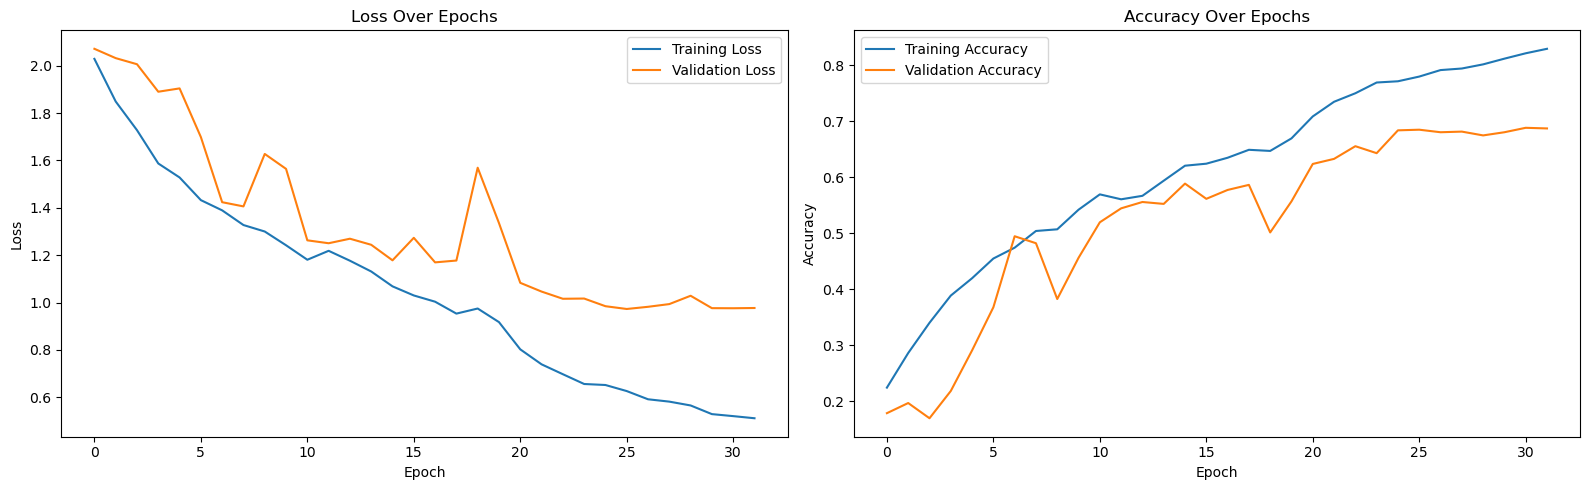

In [152]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']
epochs     = range(len(train_loss))

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Loss
ax[0].plot(epochs, train_loss, label='Training Loss')
ax[0].plot(epochs, val_loss, label='Validation Loss')
ax[0].set_title('Loss Over Epochs')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Accuracy
ax[1].plot(epochs, train_acc, label='Training Accuracy')
ax[1].plot(epochs, val_acc, label='Validation Accuracy')
ax[1].set_title('Accuracy Over Epochs')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.tight_layout()
plt.show()


In [153]:
pred_test = model.predict(x_test)
y_pred = ohe.inverse_transform(pred_test)
y_test = ohe.inverse_transform(y_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [154]:
df_ = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df_['Predicted Labels'] = y_pred.flatten()
df_['Actual Labels'] = y_test.flatten()

df_.head(10)

,Predicted Labels,Actual Labels
0,sad,sad
1,calm,calm
2,happy,happy
3,calm,calm
4,calm,calm
5,angry,angry
6,fear,sad
7,calm,calm
8,sad,sad
9,happy,happy


In [155]:
from sklearn.metrics import confusion_matrix, classification_report

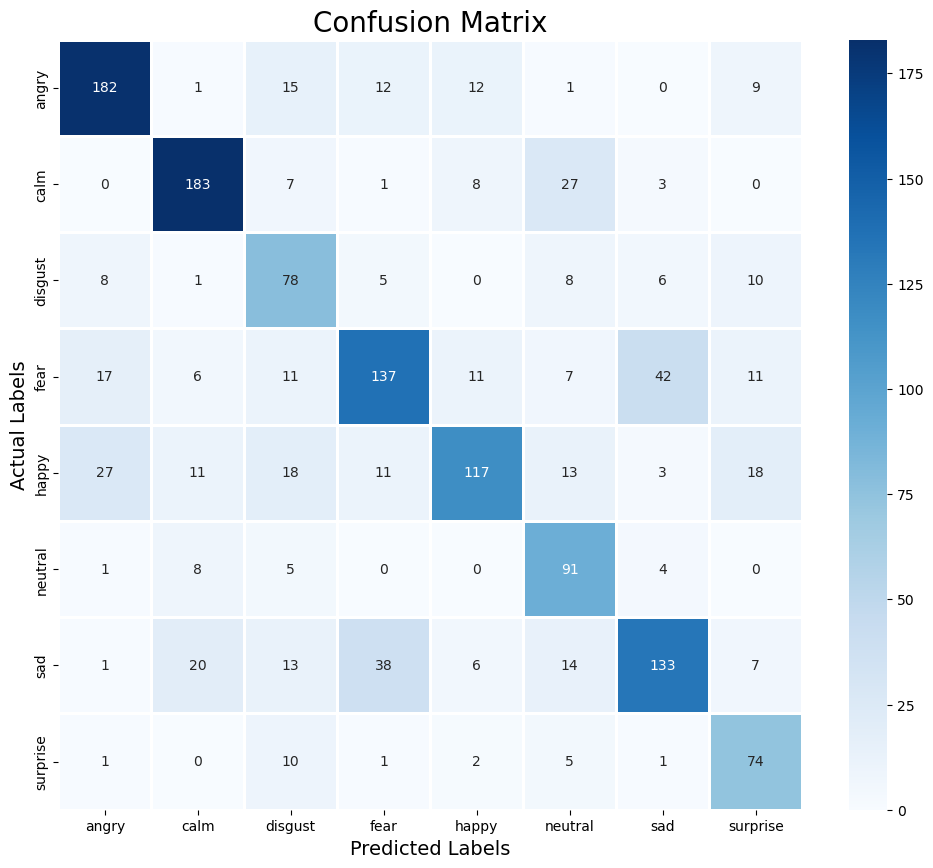

In [156]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in ohe.categories_] , columns = [i for i in ohe.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.77      0.78      0.78       232
        calm       0.80      0.80      0.80       229
     disgust       0.50      0.67      0.57       116
        fear       0.67      0.57      0.61       242
       happy       0.75      0.54      0.63       218
     neutral       0.55      0.83      0.66       109
         sad       0.69      0.57      0.63       232
    surprise       0.57      0.79      0.66        94

    accuracy                           0.68      1472
   macro avg       0.66      0.69      0.67      1472
weighted avg       0.69      0.68      0.68      1472



In [161]:
from keras.saving import save_model
save_model(model, "emotion_classifier_model.keras")